<a href="https://colab.research.google.com/github/chrissaba3/COVID-19-NN/blob/main/Covid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
from graphviz import Source
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz


Saving covid_formated_final.csv to covid_formated_final.csv


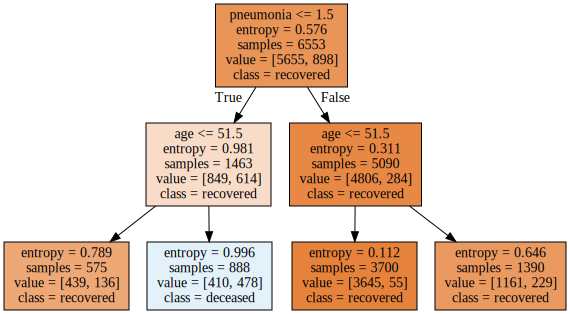

In [38]:
# uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['formated_data.csv']))

X = data.iloc[:8192,1:15].copy()
Y = data.iloc[:8192,-1:].copy()

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2,
                                                 random_state = 42)

tree_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_classifier_entropy.fit(X_train,y_train)


export_graphviz(tree_classifier_entropy,out_file=("covid_tree_entropy.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia'],
                class_names=['recovered','deceased'],
                filled = True)


Source.from_file("covid_tree_entropy.dot")

In [ ]:
y_pred = tree_classifier_entropy.predict(X_test)
accuracy_score(y_test,y_pred)

0.853

In [ ]:
print(X_train)

      sex  age  pregnancy  diabetes  ...  obesity  renal_chronic  tobacco  pneumonia
4227    1   57          2         2  ...        1              2        1          1
4676    2   32          0         2  ...        1              2        2          2
800     1   59          2         1  ...        2              2        2          2
3671    2   90          0         1  ...        2              2        2          1
4193    1   65          2         2  ...        2              2        2          2
...   ...  ...        ...       ...  ...      ...            ...      ...        ...
4426    1   36          2         2  ...        2              2        2          2
466     1   40          2         1  ...        1              2        2          2
3092    1   39          2         2  ...        1              2        2          2
3772    2   45          0         2  ...        1              2        2          1
860     1   49          2         2  ...        2              2 

In [ ]:
classification_data = copy.copy()

classification_data['classes'] = classification_data['deceased']

print(classification_data)

           id  sex  age  pregnancy  ...  intubed  patient_type  deceased  classes
0      16169f    2   27         97  ...        0             1         0        0
1      1009bf    2   24         97  ...        0             1         0        0
2      167386    1   54          2  ...        2             2         0        0
3      0b5948    2   30         97  ...        2             2         0        0
4      0d01b5    1   60          2  ...        2             2         1        1
...       ...  ...  ...        ...  ...      ...           ...       ...      ...
10759  0058c2    1   38          2  ...        0             1         0        0
10760  08220d    1   29          2  ...        0             1         0        0
10761  01e599    2   38         97  ...        1             2         1        1
10762  0bde20    1   47          2  ...        0             1         0        0
10763  018bca    1   39          2  ...        0             1         0        0

[10764 rows x 2

In [ ]:
for i in range(len(classification_data['classes'])):
 if classification_data['classes'][i] == 1:
   classification_data.loc[i,'classes'] = 'deceased'


for i in range(len(classification_data['classes'])):
 if classification_data['classes'][i] == 0:
   classification_data.loc[i,'classes'] = 'recovered'
print(classification_data)



           id  sex  age  pregnancy  ...  intubed  patient_type  deceased    classes
0      16169f    2   27         97  ...        0             1         0  recovered
1      1009bf    2   24         97  ...        0             1         0  recovered
2      167386    1   54          2  ...        2             2         0  recovered
3      0b5948    2   30         97  ...        2             2         0  recovered
4      0d01b5    1   60          2  ...        2             2         1   deceased
...       ...  ...  ...        ...  ...      ...           ...       ...        ...
10759  0058c2    1   38          2  ...        0             1         0  recovered
10760  08220d    1   29          2  ...        0             1         0  recovered
10761  01e599    2   38         97  ...        1             2         1   deceased
10762  0bde20    1   47          2  ...        0             1         0  recovered
10763  018bca    1   39          2  ...        0             1         0  re

In [ ]:
X_classification = classification_data.iloc[:5000,1:15].copy()

print(X_classification)

      sex  age  pregnancy  diabetes  ...  obesity  renal_chronic  tobacco  pneumonia
0       2   27         97         2  ...        2              2        2          2
1       2   24         97         2  ...        2              2        2          2
2       1   54          2         2  ...        1              2        2          2
3       2   30         97         2  ...        2              2        2          1
4       1   60          2         1  ...        2              2        2          2
...   ...  ...        ...       ...  ...      ...            ...      ...        ...
4995    2   62         97         2  ...        2              2        2          2
4996    2   30         97         2  ...        2              2        2          2
4997    1   55          2         1  ...        1              2        2          2
4998    2   73         97         2  ...        2              2        2          1
4999    2   76         97         2  ...        2              2 

In [ ]:
Y_classes =  classification_data.iloc[:5000,-1:]
Y_classes = pd.get_dummies(Y_classes)
print(Y_classes)

      classes_deceased  classes_recovered
0                    0                  1
1                    0                  1
2                    0                  1
3                    0                  1
4                    1                  0
...                ...                ...
4995                 0                  1
4996                 0                  1
4997                 0                  1
4998                 1                  0
4999                 0                  1

[5000 rows x 2 columns]


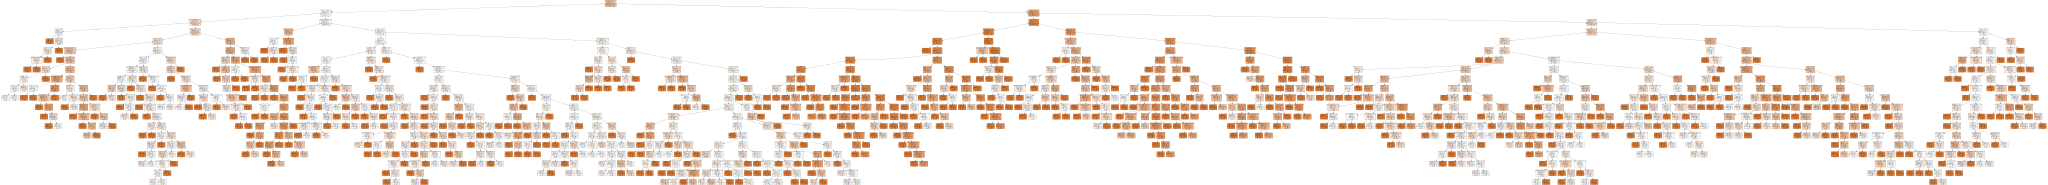

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

X_train_,X_test,y_train,y_test = train_test_split(X_classification, Y_classes, test_size=0.2,
                                                 random_state = 42)

tree_classifier_entropy = DecisionTreeClassifier(criterion='gini', max_depth=19)
tree_classifier_entropy.fit(X_train,y_train)



export_graphviz(tree_classifier_entropy,out_file=("covid_tree_entropy.dot"),
                feature_names = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia'],
                class_names=['deceased','recovered'],
                filled = True)


Source.from_file("covid_tree_entropy.dot")

In [ ]:
y_pred = tree_classifier_entropy.predict(X_test)
accuracy_score(y_test,y_pred)
print(y_pred)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [1 0]
 [0 1]]


In [ ]:


count = 0
true_id = 0
index =[0] * 1259
for i in range(len(copy['deceased'])):
  if copy['deceased'][i] == 1:
    count += 1
    index[true_id] = i
    true_id += 1


features = ['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia']
biased_target = classification_data['classes'][:1259]

biased_target = pd.get_dummies(biased_target)
# biased_data = classification_data.iloc[:count,1:15]

# for i in range(len(features)):
#   for j in range(count):
#     biased_data[features[i]][j] = classification_data[features[i]][index[j]]

for i in range(count):
  biased_target['deceased'][i] = 1
  biased_target['recovered'][i] = 0
print(biased_target)


      deceased  recovered
0            1          0
1            1          0
2            1          0
3            1          0
4            1          0
...        ...        ...
1254         1          0
1255         1          0
1256         1          0
1257         1          0
1258         1          0

[1259 rows x 2 columns]


In [ ]:
y_pred = tree_classifier_entropy.predict(biased_data)
accuracy_score(biased_target,y_pred)

0.5131056393963463

In [ ]:
print(y_pred)

[[1 0]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 1]]


In [ ]:
params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, 
                              verbose=1, cv=3)

grid_search_cv.fit(X_train,y_train)
y_pred = grid_search_cv.predict(biased_data)
accuracy_score(biased_target,y_pred)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.1s finished


0.34630659253375695

In [ ]:
print(grid_search_cv.best_params_)

{'max_leaf_nodes': 13, 'min_samples_split': 2}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.832


In [ ]:
y_pred=clf.predict(biased_data)

print("Accuracy:",metrics.accuracy_score(biased_target, y_pred))

Accuracy: 0.517077045274027


In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=['sex','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_diseaase','cardiovascular','obesity','renal_chronic','tobacco','pneumonia']).sort_values(ascending=False)
feature_imp

age               0.549959
pneumonia         0.191753
hypertension      0.042022
diabetes          0.038370
obesity           0.034320
tobacco           0.023527
cardiovascular    0.020033
renal_chronic     0.018818
other_diseaase    0.018135
copd              0.016880
sex               0.013330
inmsupr           0.012841
pregnancy         0.011593
asthma            0.008419
dtype: float64